Zomato Analysis by 
Vaishnav Tambade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot



In [ ]:
df1=pd.read_csv('zomato.csv', encoding='latin-1')
df2=pd.read_excel('Country-Code.xlsx')


In [ ]:
df1.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


checking for null values

In [ ]:
nan_values = df1.isna()
nan_columns = nan_values.any()
columns_with_nan = df1.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


merging dataset

In [ ]:
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df3 = pd.merge(df1,df2,on='Country Code',how='left')
df3.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


Analysing Dataset

In [ ]:
print('List of countries :')
for x in pd.unique(df3.Country):print(x)
print()
print('total countries : ',len(pd.unique(df3.Country)))

List of countries :
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

total countries :  15


In [ ]:
labels = list(df3.Country.value_counts().index)
values = list(df3.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

**Understanding the Rating system**

In [ ]:
rating_df=df3.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


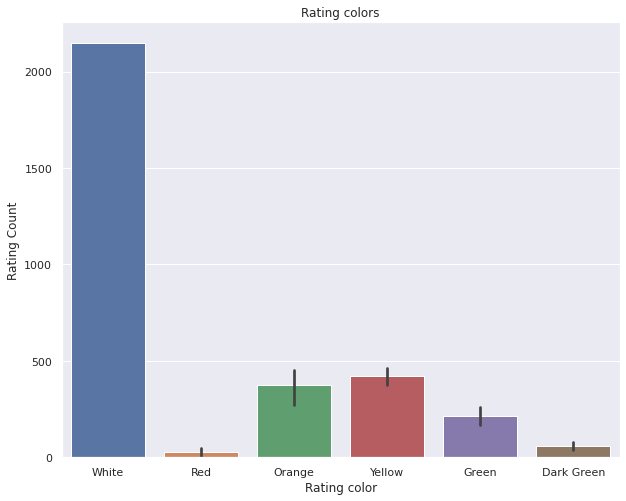

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.title('Rating colors')
sns.barplot(x=rating_df['Rating color'],y=rating_df['Rating Count'])
plt.show()

In [ ]:
no_rating=df3[df3['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
no_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**Country and Currency**

In [ ]:
cntry_currency= df3[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count',axis=1,inplace=False)
cntry_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


([<matplotlib.patches.Wedge at 0x7f368e83f610>,
 [Text(-0.7614681082348079, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.4153462408553497, 0.4329982681343308, '74.3%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.7%')])

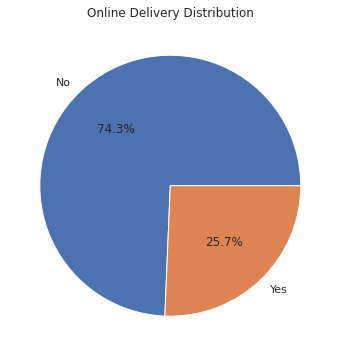

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df3['Has Online delivery'].value_counts()/9551*100, labels=df3['Has Online delivery'].value_counts().index, autopct='%1.1f%%')

**Coverage of City**

In [ ]:
plt.figure(figsize=(12,6))

labels = list(df3.City.value_counts().head(20).index)
values = list(df3.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig)
plt.show()

<Figure size 864x432 with 0 Axes>

 From which Locality maximum hotels are listed in Zomato?

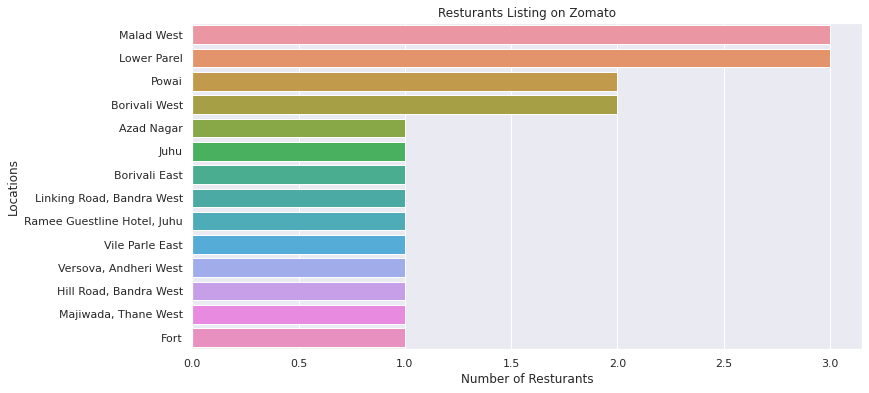

In [ ]:
Mumbai = df3[(df3.City == 'Mumbai')]
plt.figure(figsize=(12,6))
sns.barplot(x=Mumbai.Locality.value_counts().head(15), y=Mumbai.Locality.value_counts().head(15).index)

plt.ylabel('Locations');
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

What kind of Cuisine these highly rates restaurants offer?

In [ ]:
mumbai_place=Mumbai[(Mumbai.Locality.isin(['Malad West','Lower Parel','Powai','Borivali West']))&(Mumbai['Rating text'].isin(['Excellent','Very Good']))]
mumbai_place=mumbai_place.Cuisines.value_counts().reset_index()
cuisines=[]
for x in mumbai_place['index']:
  cuisines.append(x)

cuisines

['American, Burger, Fast Food',
 'North Indian, South Indian, Mughlai',
 'North Indian, Italian, Chinese, Mexican',
 'North Indian',
 'Modern Indian',
 'Pizza']

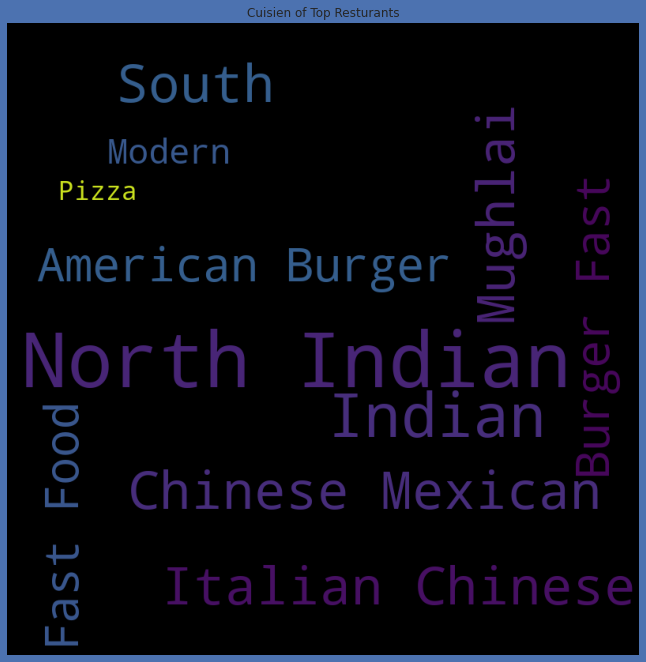

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words=''
stopwords=set(STOPWORDS)
for val in cuisines:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    comment_words +=' '.join(tokens)+' '
wordcloud=WordCloud(width=800, height=800,
                    background_color='black',
                    stopwords=stopwords,
                    min_font_size=10).generate(comment_words)
plt.figure(figsize=(9,9),facecolor='b',edgecolor='g')
plt.title('Cuisien of Top Resturants')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

How many of such restaurants accept online delivery ?


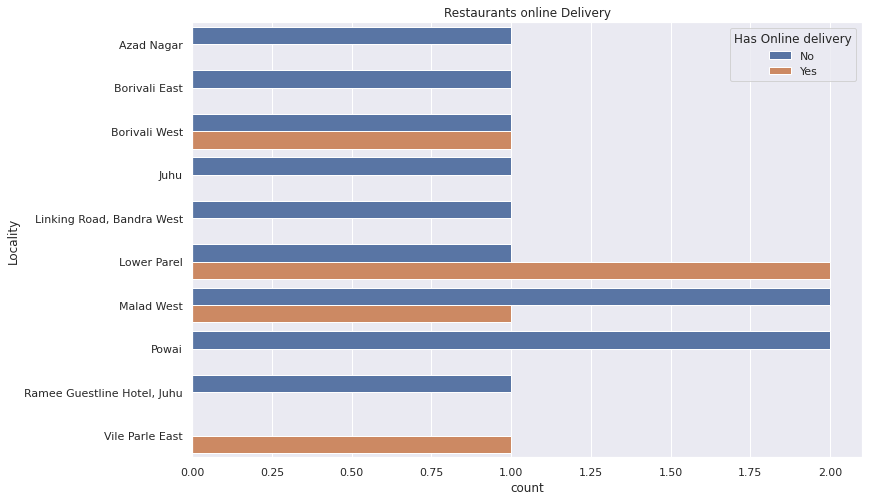

In [ ]:
delivery =Mumbai.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
onl_delivery=sns.countplot(y='Locality',hue='Has Online delivery',data=Mumbai[Mumbai.Locality.isin(delivery.index)])
plt.title('Restaurants online Delivery')
plt.show()


Understanding the Restaurants Rating localities 

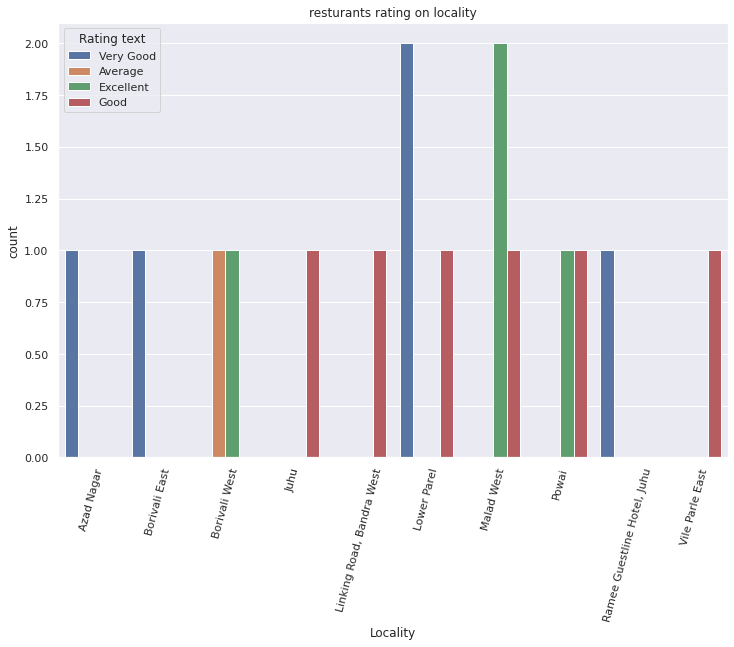

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Locality',hue='Rating text',data=Mumbai[Mumbai.Locality.isin(delivery.index)])
plt.title("resturants rating on locality")
plt.xticks(rotation=75)
plt.show()

Rating VS Cost of dinning

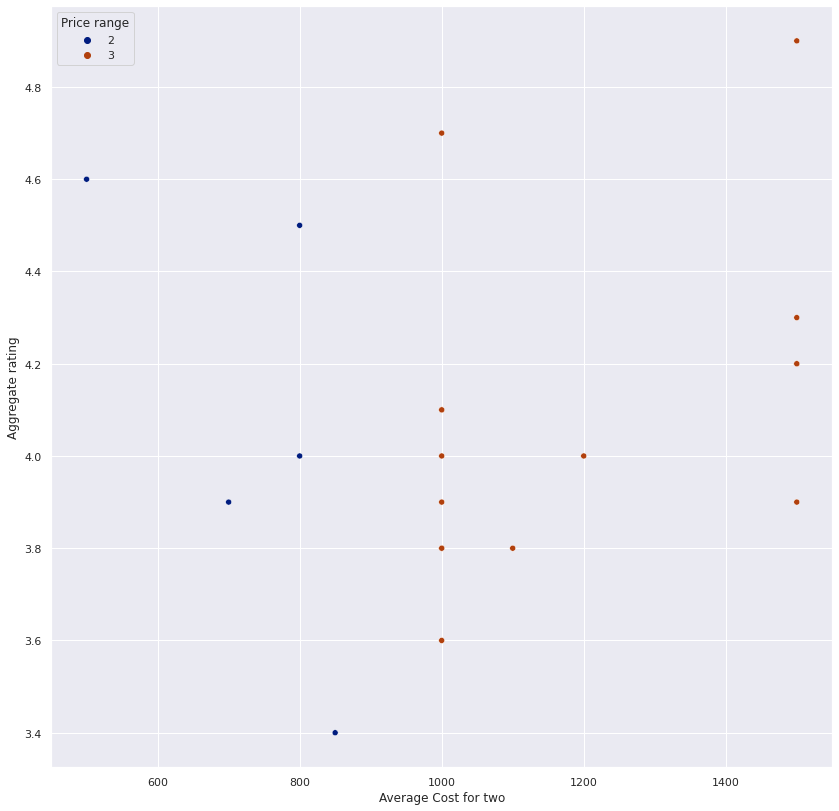

In [ ]:
plt.figure(figsize=(14,14)) 
sns.scatterplot(data=Mumbai,x='Average Cost for two',y='Aggregate rating',hue='Price range',palette='dark')
plt.show()

Location of highly rated restaurants across Mumbai

In [ ]:
Mumbai['Rating text'].value_counts()

Very Good    8
Good         7
Excellent    4
Average      1
Name: Rating text, dtype: int64

In [ ]:
highly_rated=Mumbai[Mumbai['Rating text'].isin(['Very Good'])]
fig=px.scatter_mapbox(highly_rated,lat='Latitude',lon='Longitude',hover_name='City',hover_data=['Aggregate rating','Restaurant Name'],
                      color_discrete_sequence=['fuchsia'],zoom=10,height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.update_layout(title='Highly rated restaurant location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()